# Lab: Regression Analysis

In [202]:
seed = 42

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [25]:
student_data = pd.DataFrame(columns = ['StudentID', 'Age', 'Tardies'], 
                            data = [[1, 17, 10], 
                                   [2, 51, 1],
                                   [3, 27, 5],
                                   [4, 21, 9],
                                   [5, 36, 4],
                                   [6, 48, 2],
                                   [7, 19, 9],
                                   [8, 26, 6],
                                   [9, 54, 0],
                                   [10, 30, 3]])

Draw a dispersion diagram (scatter plot) for the data.

In [125]:
def reg_plot(x, y, namex =  None, namey = None, title = None):
    """
    Create a scatter plot with a regression line.

    Parameters:
    - x (array-like): Data for the x-axis.
    - y (array-like): Data for the y-axis.
    - namex (str, optional): Label for the x-axis. Default is None.
    - namey (str, optional): Label for the y-axis. Default is None.
    - title (str, optional): Title of the plot. Default is None.

    Returns:
    None

    This function uses Seaborn's regplot to create a scatter plot with a
    regression line. It allows customization of axis labels and plot title.
    The resulting plot is displayed.
    """
    fig = plt.figure(facecolor = 'none', figsize = (5, 5))
    ax = fig.add_subplot(111, facecolor = 'none')

    sns.regplot(x = x, 
                y = y,
                color = 'r')
    plt.title(title)
    plt.xlabel(namex)
    plt.ylabel(namey)
    ax.tick_params(axis = 'both', 
               colors = 'grey')
    ax.xaxis.label.set_color('grey')
    ax.yaxis.label.set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    plt.show();

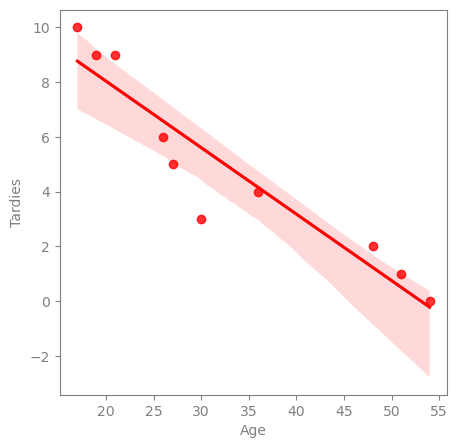

In [126]:
x = student_data['Age']
y = student_data['Tardies']
namex, namey = ['Age', 'Tardies']

reg_plot(x, y, namex, namey, title = None)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [55]:
'''
It looks like there is a tendency in which:
the amount of Tardies decrease with (the increase of) the Age.
''';

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [57]:
# covariance 

student_data['Age'].cov(student_data['Tardies'])

-45.56666666666666

In [58]:
# correlation:

student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [ ]:
'''
Both parametters measures the linear relationship between the two variables.

The covariance uses the units of the variables,
(years, days) in this case, and
the correlation is a standardized measure 
with values comprised between [0, 1]
''';

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [73]:
# We will predict the 'Tardies'
# Here X is x because it is a vector and not a Matrix and we're following the mathematical notation

x = student_data['Age']
y = student_data['Tardies']

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = seed)


# 'standarize' x --> N(0, 1)

scaler = StandardScaler()

scaler.fit(x_train.values.reshape(-1, 1))

x_train = scaler.transform(x_train.values.reshape(-1, 1))
x_test = scaler.transform(x_test.values.reshape(-1, 1))

In [74]:
# I'll try different linear regressions at once:
regressors = {'LinReg': LinearRegression(),
              'Lasso': Lasso(),
              'Ridge': Ridge(),
              'ElNet': ElasticNet()}

In [200]:
def fit_and_score(models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    """
    Fits the given machine learning models to the training data and evaluates their performance on the test data.

    Parameters:
    - models (dict): A dictionary where keys are model names and values are the corresponding machine learning models.
    - X_train (array-like): Feature matrix of the training set.
    - X_test (array-like): Feature matrix of the test set.
    - y_train (array-like): True labels of the training set.
    - y_test (array-like): True labels of the test set.

    Returns:
    dict: A dictionary where keys are model names and values are their corresponding accuracy scores on the test set.

    This function takes a dictionary of machine learning models and fits each model to the training data.
    It then evaluates the performance of each model on the provided test data using the `score` method, 
    and returns a dictionary of model names and their corresponding accuracy scores.
    """
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = round(model.score(X_test, y_test), 2)
    return model_scores 

In [80]:
reg_r2 = fit_and_score(regressors, X_train = x_train, X_test = x_test)

regressors_df = pd.DataFrame(reg_r2.items(), columns=["Model", "R2"])
regressors_df = regressors_df[regressors_df['R2'] >= 0]
regressors_df

,Model,R2
2,Ridge,0.54


In [81]:
'''
The only regression with an acceptable value of R2 is Ridge.
''';

Plot your regression model on your scatter plot.

In [145]:
ridge = Ridge()

ridge.fit(x_train, y_train)

train_score = ridge.score(x_train, y_train)
test_score = ridge.score(x_test, y_test)

print(train_score, test_score, ridge.coef_[0], ridge.intercept_)

0.7939644294386468 0.5433195371943667 -2.254189953931864 6.0


In [179]:
def scatter_plot(x, y, namex = None, namey = None, title = None, slope = None, intercept = None):
    """
    Create a scatter plot with an optional regression line and equation.

    Parameters:
    - x (array-like): Data for the x-axis.
    - y (array-like): Data for the y-axis.
    - namex (str, optional): Label for the x-axis. Default is None.
    - namey (str, optional): Label for the y-axis. Default is None.
    - title (str, optional): Title of the plot. Default is None.
    - slope (float, optional): Slope of the regression line. Default is None.
    - intercept (float, optional): Intercept of the regression line. Default is None.

    Returns:
    None

    This function creates a scatter plot using Seaborn's regplot. It allows customization
    of axis labels and plot title. Optionally, if slope and intercept are provided, it
    annotates the plot with the equation of the regression line.
    """
    fig = plt.figure(facecolor = 'none', figsize = (5, 5))
    ax = fig.add_subplot(111, facecolor = 'none')
    
    sns.regplot(x = x, 
                y = y, 
                color = 'r')

    plt.title(title)
    plt.xlabel(namex)
    plt.ylabel(namey)

    if slope is not None and intercept is not None:
        equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
        plt.annotate(equation_text, 
                     xy = (0.6, 0.9), 
                     xycoords = 'axes fraction', 
                     fontsize = 10,
                     color = 'grey')
        
    ax.tick_params(axis = 'both', 
               colors = 'grey')
    ax.xaxis.label.set_color('grey')
    ax.yaxis.label.set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    plt.show();

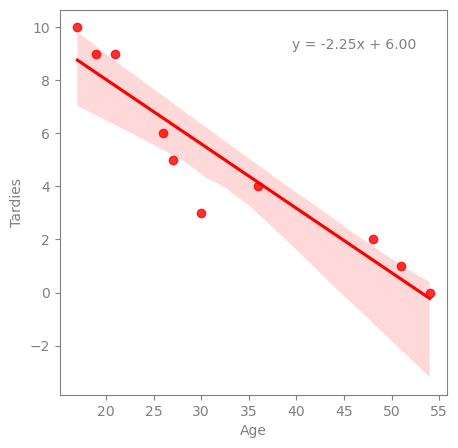

In [180]:
x = student_data['Age']
y = student_data['Tardies']
namex, namey = ['Age', 'Tardies']
slope = ridge.coef_[0]
intercept = ridge.intercept_

scatter_plot(x, y, namex, namey, slope = slope, intercept = intercept)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [150]:
# Interpret the results of your model. 
# What can conclusions can you draw from your model and how confident in these conclusions are you? 
'''
Ridge model is fitting better than the rest, because of the score.
However, it is still a bad model because it is overfitting,
the difference between R2 values of the training and the testing sets is bigger than 10%,
it is indeed decreasing a 25% in the test.
'''

# Can we say that age is a good predictor of tardiness?
'''
With this amount of data, it seems that there is a tendency...
However, I would like to improve the model score before throwing more light...
''';

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [155]:
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [164]:
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [165]:
def plt_corr(df):
    """
    Generate and display a heatmap of the correlation matrix for a given DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame for which the correlation matrix will be visualized.

    Returns:
    None

    This function creates a heatmap using seaborn to display the correlation matrix of the input DataFrame.
    The upper triangle of the heatmap is masked to focus on the lower triangle, and correlation values are annotated
    within each cell. The color map 'Greys' is used, and the color bar is adjusted to shrink its size.
    """
    fig = plt.figure(facecolor = 'none', 
                     figsize = (10, 10))

    ax = fig.add_subplot(111, 
                         facecolor = 'none')

    mask = np.triu(np.ones_like(df.corr(), 
                                dtype = bool))

    sns.heatmap(df.corr(),
                mask = mask,
                cmap = 'Greys',
                center = 0,
                annot = True,
                cbar_kws = {'shrink': 0.5})

    ax.tick_params(axis = 'both', 
                   colors = 'grey')
    ax.xaxis.label.set_color('grey')
    ax.yaxis.label.set_color('grey')
    plt.show();

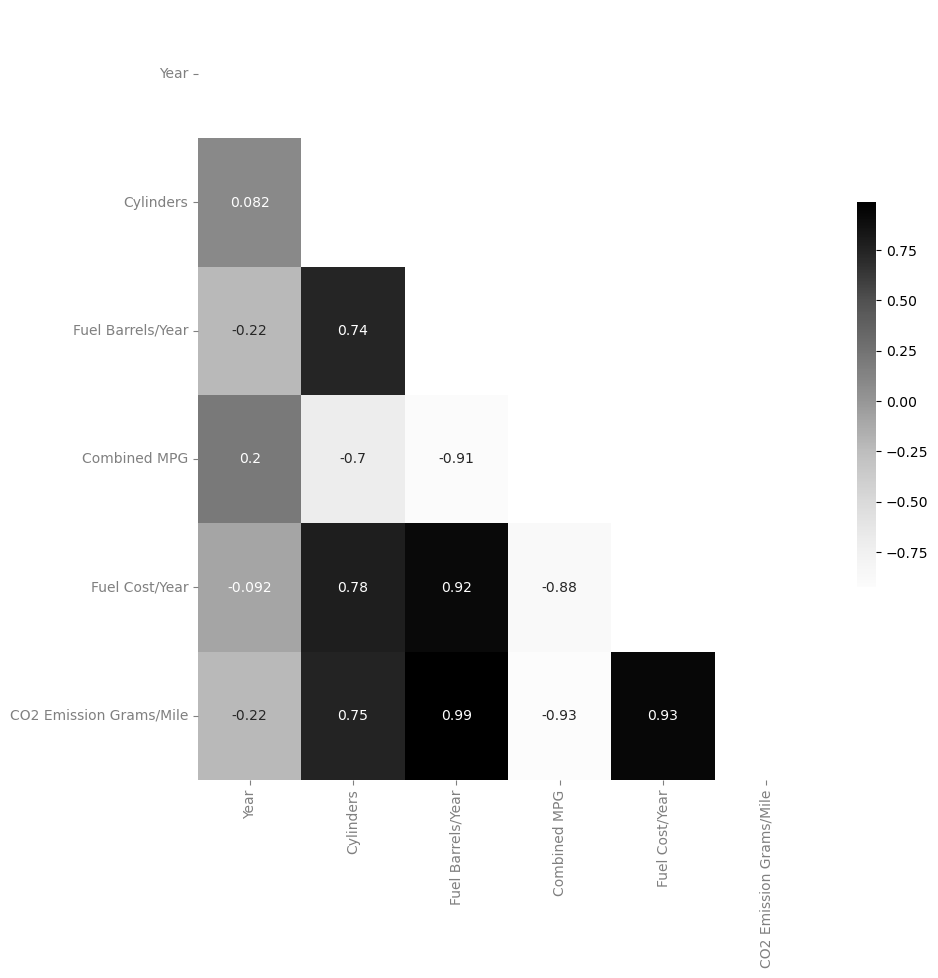

In [166]:
plt_corr(vehicles)

In [168]:
'''
From the correlation Matrix we can conclude that the column 'Fuel Cost/Year' can be removed
This is because the colinearity with 'Fuel Barrels/Year'.
From the two, I decided to save 'Fuel Cost/Year' because the corretation with our target is higher.
'''
# Which provides the least amount of helpful information for determining CO2 emissions?
'''
The column 'Year' is the one with the correlation value closer to 0,
that indicates no correlation.
''';

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [186]:
# Separate the data

X = vehicles.drop('CO2 Emission Grams/Mile', axis = 1)
y = vehicles['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = seed)

# Normalize the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28761, 5), (7191, 5), (28761,), (7191,))

In [218]:
regres = {'GrBoo': GradientBoostingRegressor(),
          'ElN': ElasticNet(),
          'Las': Lasso(),
          'Rid': Ridge(),
          'MLP': MLPRegressor(),
          'KNR': KNeighborsRegressor(),
          'lSVR': LinearSVR(),
          'RF': RandomForestRegressor(),
          'SVR': SVR(),
          'lReg': LinearRegression()}

In [219]:
models_r2 = fit_and_score(models = regres, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

In [220]:
models_df = pd.DataFrame(models_r2.items(), columns=["Model", "R2"])
models_df = models_df[models_df['R2'] >= 0]

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

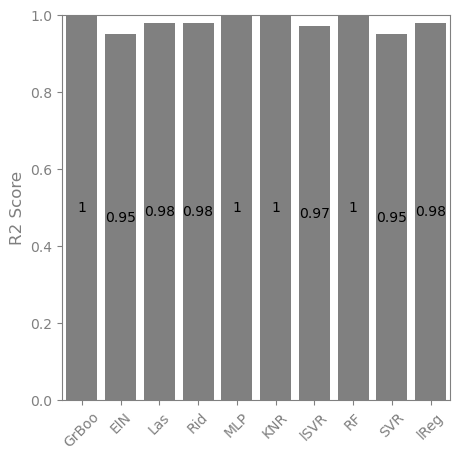

In [226]:
fig = plt.figure(facecolor = 'none', figsize = (5, 5))
ax = fig.add_subplot(111, facecolor = 'none')

xaxis = models_df['Model']
yaxis = models_df['R2']

sns.barplot(x = xaxis, 
            y = yaxis,
            color = 'grey')

ax.bar_label(ax.containers[0], 
             label_type = 'center',
             color = 'black')

ax.set_ylim(0, 1)
ax.set_xticklabels(labels = xaxis, 
                   rotation = 45)
ax.set_ylabel('R2 Score', 
              fontsize = 12)
ax.set_xlabel('')
ax.tick_params(axis = 'both', 
               colors = 'grey')
ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.show();

In [ ]:
'''
Regression models with R2_score = 1:

    'GrBoo': GradientBoostingRegressor()
    'MLP': MLPRegressor()
    'KNR': KNeighborsRegressor()
    'RF': RandomForestRegressor()

R2_score = 0.98:

    'Las': Lasso()
    'Rid': Ridge()
    'lReg': LinearRegression()
    
R2_score < 0.98:

    'lSVR': LinearSVR()
    'SVR': SVR()
    'ElN': ElasticNet()
''';

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [231]:
data = pd.DataFrame(columns = ['X', 'Y'], 
                    data = [[1, 1],
                            [3, 2],
                            [4, 4],
                            [6, 4],
                            [8, 5],
                            [9, 7],
                            [11, 8],
                            [14, 13]])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

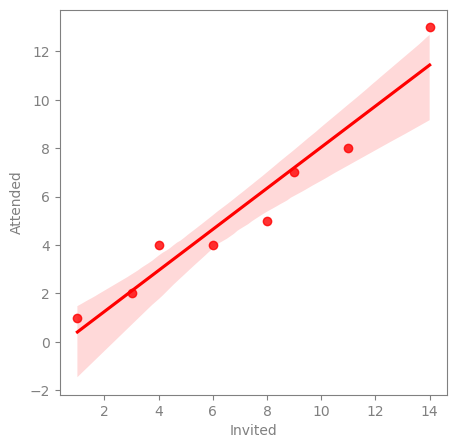

In [232]:
x = data['X']
y = data['Y']
namex, namey = ['Invited', 'Attended']

reg_plot(x, y, namex, namey, title = None)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [243]:
'''
It seems that there is a tendency:
The more you invite, the more will attend

The Linear Regression showed in the plot is plotted together with 
the confidence interval of the regression...

There are some points with a bigger error than that.
''';